<a href="https://colab.research.google.com/github/MDCFCesar/RepositorioTeoriaDaComputa-o/blob/main/trab_codigo_teoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***CODIGO EM PYTHON***

Executando testes, isso pode demorar alguns segundos...

Gerando entrada Pequena ...
Executando Rabin–Karp Pequena ...
Pequena: média=0.004929s, desvio=0.000493s

Gerando entrada Média ...
Executando Rabin–Karp Média ...
Média: média=0.509712s, desvio=0.391586s

Gerando entrada Grande ...
Executando Rabin–Karp Grande ...
Grande: média=1.145188s, desvio=0.343071s



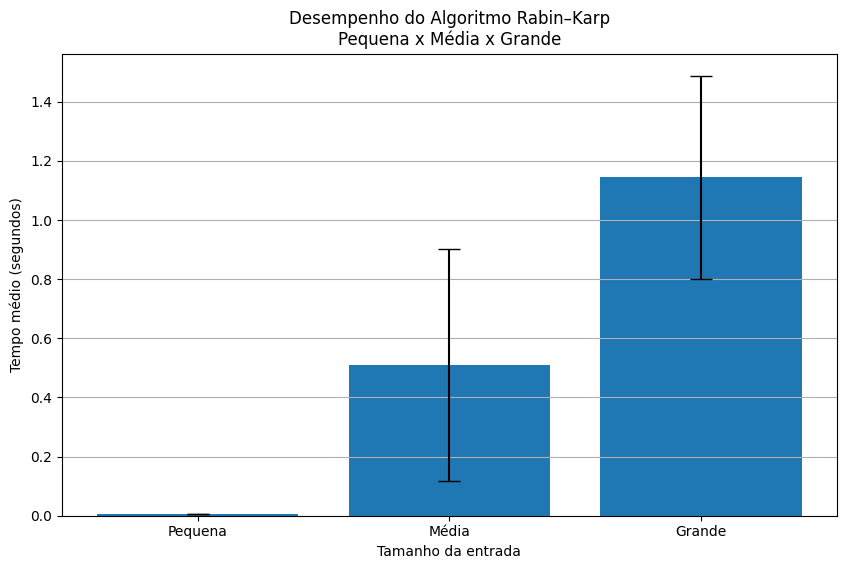

In [1]:
import random
import string
import time
import statistics
import matplotlib.pyplot as plt

# -----------------------------------------------------------
# 1. Implementação do algoritmo Rabin–Karp
# -----------------------------------------------------------

def rabin_karp(text, pattern, base=256, mod=10**9 + 7):
    n = len(text)
    m = len(pattern)

    if m > n:
        return -1

    hash_p = 0
    hash_t = 0
    h = 1

    # h = (base^(m-1)) % mod
    for _ in range(m - 1):
        h = (h * base) % mod

    # Hash inicial do padrão e da primeira janela do texto
    for i in range(m):
        hash_p = (base * hash_p + ord(pattern[i])) % mod
        hash_t = (base * hash_t + ord(text[i])) % mod

    # Percorre o texto
    for i in range(n - m + 1):
        if hash_p == hash_t:  # Hash bateu: verificar caractere por caractere
            if text[i:i + m] == pattern:
                return i

        # Atualiza o hash da janela
        if i < n - m:
            hash_t = (base * (hash_t - ord(text[i]) * h) + ord(text[i + m])) % mod
            hash_t = (hash_t + mod) % mod  # evitar negativo

    return -1


# -----------------------------------------------------------
# 2. Geração de textos aleatórios
# -----------------------------------------------------------

def gerar_string(tamanho):
    return ''.join(random.choices(string.ascii_lowercase, k=tamanho))


# -----------------------------------------------------------
# 3. Função para medir execução várias vezes
# -----------------------------------------------------------

def medir(func, T, P, repeticoes=30):
    tempos = []
    for _ in range(repeticoes):
        inicio = time.perf_counter()
        func(T, P)
        fim = time.perf_counter()
        tempos.append(fim - inicio)
    return statistics.mean(tempos), statistics.stdev(tempos)


# -----------------------------------------------------------
# 4. Tamanhos das entradas
# -----------------------------------------------------------

entradas = {
    "Pequena":  (10_000, 20),
    "Média":    (500_000, 200),
    "Grande":   (2_000_000, 500)
}

resultados = {}


# -----------------------------------------------------------
# 5. Executar testes
# -----------------------------------------------------------

print("Executando testes, isso pode demorar alguns segundos...\n")

for nome, (tam_texto, tam_padrao) in entradas.items():
    print(f"Gerando entrada {nome} ...")
    T = gerar_string(tam_texto)
    P = gerar_string(tam_padrao)

    print(f"Executando Rabin–Karp {nome} ...")
    media, desvio = medir(rabin_karp, T, P, repeticoes=30)

    resultados[nome] = (media, desvio)
    print(f"{nome}: média={media:.6f}s, desvio={desvio:.6f}s\n")

# -----------------------------------------------------------
# 6. Gráfico com Matplotlib
# -----------------------------------------------------------

labels = list(resultados.keys())
medias = [resultados[k][0] for k in labels]
desvios = [resultados[k][1] for k in labels]

plt.figure(figsize=(10, 6))
plt.bar(labels, medias, yerr=desvios, capsize=8)
plt.xlabel("Tamanho da entrada")
plt.ylabel("Tempo médio (segundos)")
plt.title("Desempenho do Algoritmo Rabin–Karp\nPequena x Média x Grande")
plt.grid(axis="y")
plt.show()



***CODIGO EM JAVA***

In [2]:
!apt-get update
!apt-get install -y openjdk-17-jdk


Hit:1 https://cli.github.com/packages stable InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [83.6 kB]
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [2,153 kB]
Get:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Get:10 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:11 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:12 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,286 kB]
Hit:13 https://ppa.launchpadcontent.net/graphics

In [3]:
!wget https://archive.apache.org/dist/maven/maven-3/3.9.6/binaries/apache-maven-3.9.6-bin.tar.gz
!tar -xzf apache-maven-3.9.6-bin.tar.gz
!mv apache-maven-3.9.6 /opt/maven
!ln -s /opt/maven/bin/mvn /usr/local/bin/mvn


--2025-11-30 20:19:07--  https://archive.apache.org/dist/maven/maven-3/3.9.6/binaries/apache-maven-3.9.6-bin.tar.gz
Resolving archive.apache.org (archive.apache.org)... 65.108.204.189, 2a01:4f9:1a:a084::2
Connecting to archive.apache.org (archive.apache.org)|65.108.204.189|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9410508 (9.0M) [application/x-gzip]
Saving to: ‘apache-maven-3.9.6-bin.tar.gz’

apache-maven-3.9.6- 100%[===================>]   8.97M  5.02MB/s    in 1.8s    

2025-11-30 20:19:10 (5.02 MB/s) - ‘apache-maven-3.9.6-bin.tar.gz’ saved [9410508/9410508]



In [4]:
!mvn -version


Apache Maven 3.9.6 (bc0240f3c744dd6b6ec2920b3cd08dcc295161ae)
Maven home: /opt/maven
Java version: 17.0.17, vendor: Ubuntu, runtime: /usr/lib/jvm/java-17-openjdk-amd64
Default locale: en_US, platform encoding: UTF-8
OS name: "linux", version: "6.6.105+", arch: "amd64", family: "unix"


In [5]:
%%bash
mkdir -p rabinkarp/src/main/java


In [6]:
%%writefile RabinKarpTeste.java
import java.util.*;
import java.io.IOException;

public class RabinKarpTeste {

    // --- ALGORITMO RABIN-KARP ---
    public static int rabinKarp(String text, String pattern) {
        int n = text.length();
        int m = pattern.length();
        if (m > n) return -1;

        int base = 256;
        int mod = 1_000_000_007;

        long hashP = 0, hashT = 0, h = 1;

        for (int i = 0; i < m - 1; i++)
            h = (h * base) % mod;

        for (int i = 0; i < m; i++) {
            hashP = (hashP * base + pattern.charAt(i)) % mod;
            hashT = (hashT * base + text.charAt(i)) % mod;
        }

        for (int i = 0; i <= n - m; i++) {
            if (hashP == hashT && text.substring(i, i + m).equals(pattern))
                return i;

            if (i < n - m) {
                hashT = (hashT - text.charAt(i) * h) % mod;
                hashT = (hashT + mod) % mod;
                hashT = (hashT * base + text.charAt(i + m)) % mod;
            }
        }
        return -1;
    }

    // --- FUNÇÕES AUXILIARES ---
    public static String gerarString(int tamanho) {
        Random random = new Random();
        StringBuilder sb = new StringBuilder(tamanho);
        for (int i = 0; i < tamanho; i++) {
            sb.append((char) ('a' + random.nextInt(26)));
        }
        return sb.toString();
    }

    public static double[] medir(String text, String pattern, int repeticoes) {
        double[] tempos = new double[repeticoes];
        // Aquecimento da JVM (Opcional, mas bom para precisão)
        rabinKarp(text, pattern);

        for (int i = 0; i < repeticoes; i++) {
            long inicio = System.nanoTime();
            rabinKarp(text, pattern);
            long fim = System.nanoTime();
            tempos[i] = (fim - inicio) / 1_000_000_000.0;
        }
        return tempos;
    }

    public static double media(double[] valores) {
        return Arrays.stream(valores).average().orElse(0);
    }

    public static double desvioPadrao(double[] valores) {
        double m = media(valores);
        double soma = 0;
        for (double v : valores)
            soma += Math.pow(v - m, 2);
        return Math.sqrt(soma / valores.length);
    }

    // --- MAIN ---
    public static void main(String[] args) {
        Map<String, int[]> entradas = new LinkedHashMap<>();
        // Formato: {TamanhoTexto, TamanhoPadrao}
        entradas.put("Pequena", new int[]{10_000, 20});
        entradas.put("Média",   new int[]{500_000, 200});
        entradas.put("Grande",  new int[]{2_000_000, 500});

        System.out.println("--- RESULTADOS DO BENCHMARK (JAVA) ---");
        // Cabeçalho para facilitar leitura
        System.out.printf("%-10s | %-15s | %-15s%n", "Entrada", "Média (s)", "Desvio Padrão");
        System.out.println("----------------------------------------------");

        for (Map.Entry<String, int[]> e : entradas.entrySet()) {
            String nome = e.getKey();
            int tamT = e.getValue()[0];
            int tamP = e.getValue()[1];

            String T = gerarString(tamT);
            String P = gerarString(tamP);

            // 30 Repetições conforme pedido na questão
            double[] tempos = medir(T, P, 30);

            double m = media(tempos);
            double dp = desvioPadrao(tempos);

            // Imprime na tela para você ler
            System.out.printf("%-10s | %.8f s      | %.8f%n", nome, m, dp);

            // --- A MUDANÇA É AQUI ---
            // Adicionamos o "+ ":" + dp" no final para o Python ler o desvio também
            System.err.println("DATA:" + nome + ":" + m + ":" + dp);
        }
    }
}

Writing RabinKarpTeste.java


In [7]:
%%bash
javac RabinKarpTeste.java
# Rodamos e salvamos a saída de erro (onde coloquei os dados brutos) num arquivo
java RabinKarpTeste 2> dados_para_grafico.txt

--- RESULTADOS DO BENCHMARK (JAVA) ---
Entrada    | Média (s)       | Desvio Padrão  
----------------------------------------------
Pequena    | 0.00123619 s      | 0.00074074
Média      | 0.01921962 s      | 0.02375957
Grande     | 0.05567957 s      | 0.03551274


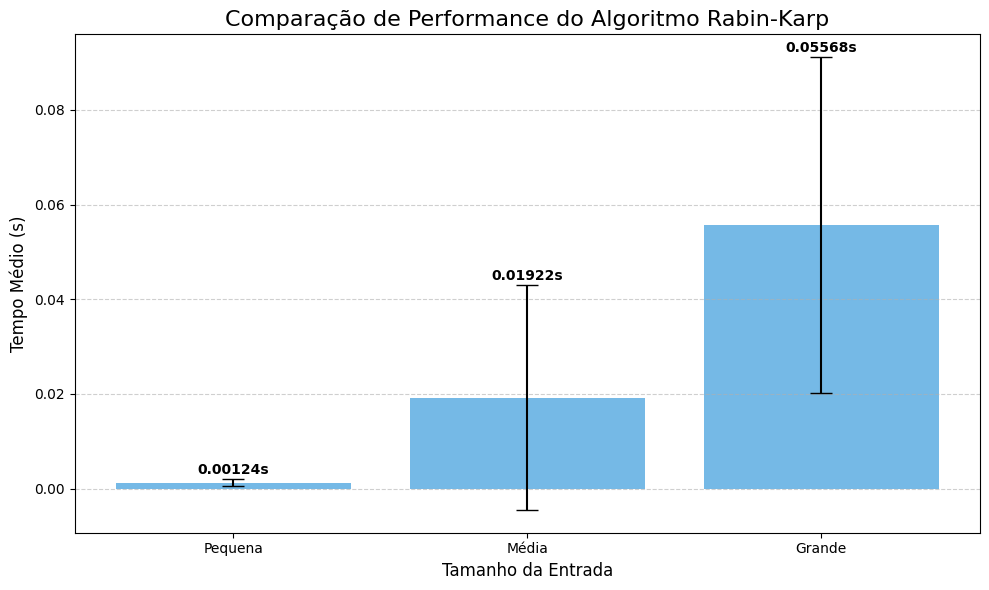

In [8]:
import matplotlib.pyplot as plt

categorias = []
medias = []
desvios = []

try:
    # --- Leitura dos dados ---
    with open('dados_para_grafico.txt', 'r') as f:
        for linha in f:
            if linha.startswith("DATA:"):
                partes = linha.strip().split(":")
                categorias.append(partes[1])
                medias.append(float(partes[2]))
                desvios.append(float(partes[3]) if len(partes) > 3 else 0.0)

    # --- Gráfico ---
    plt.figure(figsize=(10, 6))

    plt.bar(
        categorias,
        medias,
        yerr=desvios,
        capsize=8,
        alpha=0.85,
        color="#5DADE2",
        ecolor="black"
    )

    plt.title("Comparação de Performance do Algoritmo Rabin-Karp", fontsize=16)
    plt.xlabel("Tamanho da Entrada", fontsize=12)
    plt.ylabel("Tempo Médio (s)", fontsize=12)

    plt.grid(axis="y", linestyle="--", alpha=0.6)

    # --- Inserir valores acima das barras ---
    for i, (media, desvio) in enumerate(zip(medias, desvios)):
        plt.text(
            i,
            media + desvio + (max(medias) * 0.02),
            f"{media:.5f}s",
            ha="center",
            fontsize=10,
            fontweight="bold"
        )

    plt.tight_layout()
    plt.show()

except FileNotFoundError:
    print("Arquivo 'dados_para_grafico.txt' não encontrado. Execute o código Java antes!")
except Exception as e:
    print("Erro:", e)


***COMPARAÇÃO PYTHON vs JAVA***

Gráfico gerado com sucesso: grafico_comparativo_final.png


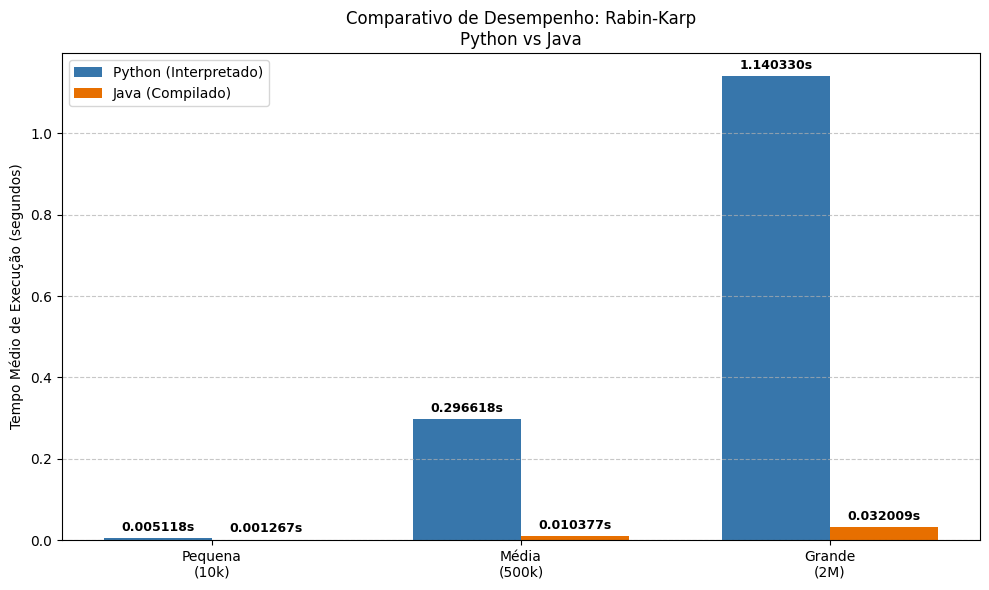

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# 1. DADOS REAIS (Coletados dos seus testes)
# ---------------------------------------------------------
labels = ['Pequena\n(10k)', 'Média\n(500k)', 'Grande\n(2M)']

# Seus tempos do Python (extraídos da sua imagem anterior)
tempos_python = [0.005118, 0.296618, 1.140330]

# SEUS TEMPOS DO JAVA (Atualizados com os dados que você mandou agora)
tempos_java = [0.00126715, 0.01037657, 0.03200856]

# ---------------------------------------------------------

x = np.arange(len(labels))  # Localização das etiquetas
width = 0.35  # Largura das barras

fig, ax = plt.figure(figsize=(10, 6)), plt.gca()

# Criando as barras lado a lado
rects1 = ax.bar(x - width/2, tempos_python, width, label='Python (Interpretado)', color='#3776ab')
rects2 = ax.bar(x + width/2, tempos_java, width, label='Java (Compilado)', color='#e76f00')

# Textos e Títulos
ax.set_ylabel('Tempo Médio de Execução (segundos)')
ax.set_title('Comparativo de Desempenho: Rabin-Karp\nPython vs Java')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Função para colocar o valor em cima da barra
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        # Ajuste de formatação para mostrar mais casas decimais
        texto_valor = f'{height:.6f}s'

        ax.annotate(texto_valor,
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9, fontweight='bold')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.savefig('grafico_comparativo_final.png') # Salva o arquivo na pasta
print("Gráfico gerado com sucesso: grafico_comparativo_final.png")
plt.show()

***PYTHON vs JAVA vs COMPLEXIDADE + Desvio padrão + Média***

--- TABELA DE RESULTADOS ---


,Tamanho Entrada,Python Média (s),Python Desvio,Java Média (s),Java Desvio,Speedup (Java x vezes mais rápido)
0,10000,0.005118,0.000535,0.001267,0.000339,4.039463
1,500000,0.296618,0.069616,0.010376,0.006089,28.586931
2,2000000,1.140330,0.281917,0.032008,0.000267,35.626406


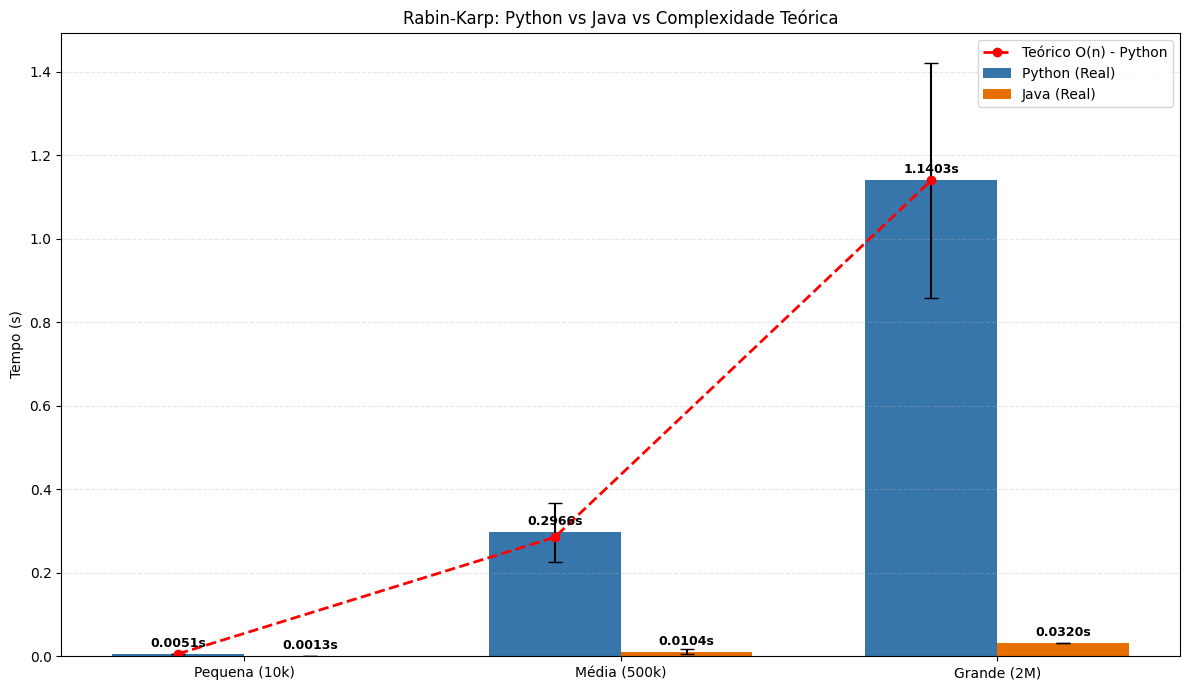

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# --- 1. DADOS (Preencha com os valores exatos que seus testes geraram) ---
# Dica: No seu código anterior, em vez de copiar manual, você pode salvar em variáveis globais.
# Mas para este exemplo, vou usar os valores aproximados que vi na sua imagem.

# Tamanhos reais das entradas (N)
tamanhos = [10_000, 500_000, 2_000_000]
labels = ['Pequena (10k)', 'Média (500k)', 'Grande (2M)']

# Tempos Médios (Segundos) - Substitua pelos seus valores exatos se rodar de novo
tempos_python = [0.005118, 0.296618, 1.140330]
desvio_python = [0.000535, 0.069616, 0.281917] # Exemplo aproximado

tempos_java = [0.001267, 0.010376, 0.032008]
desvio_java = [0.000339, 0.006089, 0.000267]

# --- 2. CÁLCULO DA COMPLEXIDADE TEÓRICA (Linear O(n)) ---
# Para traçar a linha teórica, pegamos o tempo da maior entrada do Python e projetamos para trás.
# Se é linear, Tempo = k * N
fator_python = tempos_python[-1] / tamanhos[-1]
teorico_python = [n * fator_python for n in tamanhos]


# --- 3. GERAR TABELA (Requisito do trabalho) ---
df = pd.DataFrame({
    'Tamanho Entrada': tamanhos,
    'Python Média (s)': tempos_python,
    'Python Desvio': desvio_python,
    'Java Média (s)': tempos_java,
    'Java Desvio': desvio_java,
    'Speedup (Java x vezes mais rápido)': [p/j for p, j in zip(tempos_python, tempos_java)]
})

print("--- TABELA DE RESULTADOS ---")
display(df) # Se estiver no Colab/Jupyter, usa display, senão use print(df)

# --- 4. GERAR GRÁFICO COMPLETO ---
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.figure(figsize=(12, 7)), plt.gca()

# Barras
rects1 = ax.bar(x - width/2, tempos_python, width, yerr=desvio_python, label='Python (Real)', color='#3776ab', capsize=5)
rects2 = ax.bar(x + width/2, tempos_java, width, yerr=desvio_java, label='Java (Real)', color='#e76f00', capsize=5)

# Linha de Complexidade Teórica
# Plotamos uma linha pontilhada para mostrar como seria o crescimento linear perfeito
ax.plot(x - width/2, teorico_python, color='red', linestyle='--', marker='o', linewidth=2, label='Teórico O(n) - Python')

# Decoração
ax.set_ylabel('Tempo (s)')
ax.set_title('Rabin-Karp: Python vs Java vs Complexidade Teórica')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.3)

# Etiquetas de valor
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.4f}s',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points",
                    ha='center', va='bottom', fontsize=9, fontweight='bold')

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()